Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yield_df.csv to yield_df.csv


In [ ]:
import io
import pandas as pd
yield_data = pd.read_csv(io.BytesIO(uploaded['yield_df.csv']))

In [ ]:
yield_data

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


# **DATA CLEANING, EXPLORATORY AND MANIPULATION**

Data Cleaning

In [ ]:
#drop first column (unnamed column)
yield_data.drop(['Unnamed: 0'], axis=1 , inplace=True)

In [ ]:
yield_data

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


Summary of dataset

In [ ]:
#shape of dataset
yield_data.shape

(28242, 7)

In [ ]:
#list of attributes
yield_data.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
#dataset info
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
#check null values in all attributes
yield_data.columns[yield_data.isnull().any()]

Index([], dtype='object')

In [ ]:
#confirm total null values in attributes
yield_data.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
yield_data.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


**Change attributes name**

hg/ha_yield = yield_size

average_rain_fall_mm_per_year = avg_rain

pesticides_tonnes = pesticides

In [ ]:
#rename attributes
yield_new = yield_data.rename(
        columns = {'hg/ha_yield':'yield_size'
                   ,'average_rain_fall_mm_per_year':'avg_rain'
                   ,'pesticides_tonnes':'pesticides'
                   }
        )

In [ ]:
yield_new

,Area,Item,Year,yield_size,avg_rain,pesticides,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


Correlation Features

<Axes: >

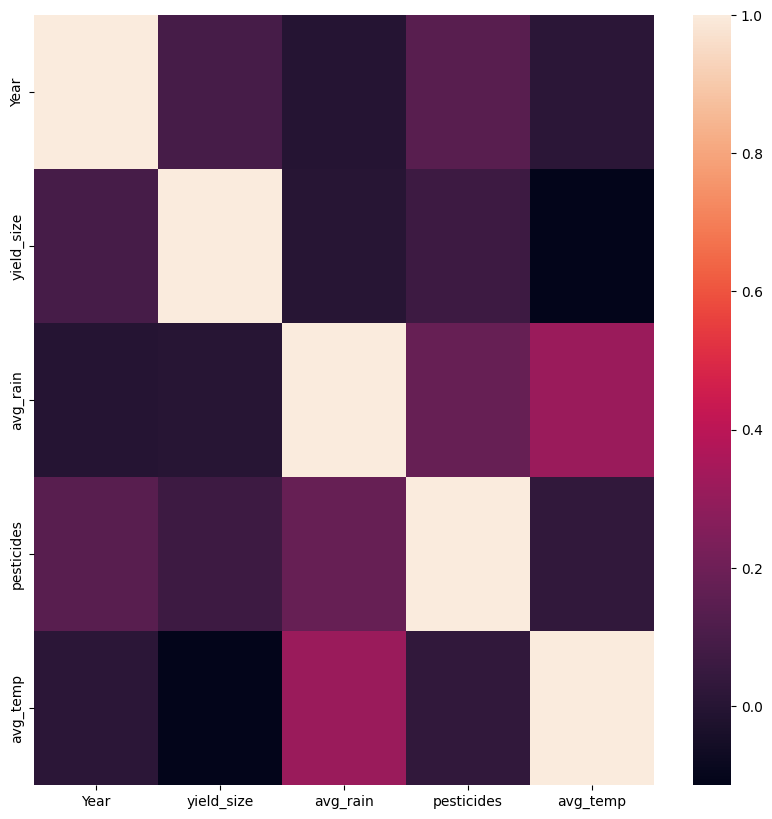

In [ ]:
import pandas as pd
import seaborn as sns #seaborn library 
import matplotlib.pyplot as plt
import numpy as np

numeric_data = yield_new.select_dtypes(include=[np.number])
categorical_data = yield_new.select_dtypes(exclude=[np.number])

corr = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr)

**Positive correlation**

Strong correlation:-

1) avg_temp and avg_rain

2) year and pesticides

3) pesticides and avg_rain


Check outliers (if any)

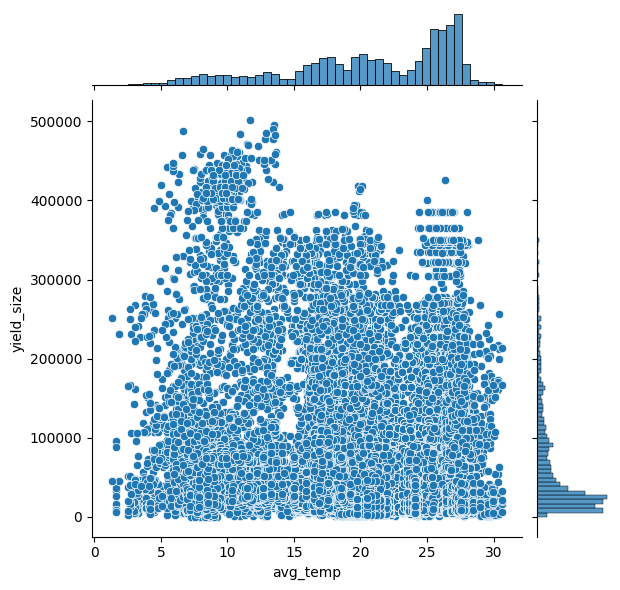

In [ ]:
import seaborn as sns
sns.jointplot(x=yield_new['avg_temp'], y=yield_new['yield_size'])

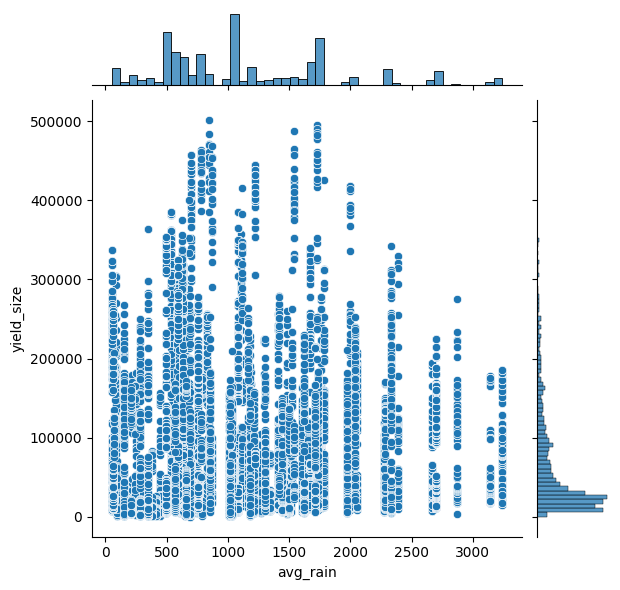

In [ ]:
sns.jointplot(x=yield_new['avg_rain'], y=yield_new['yield_size'])

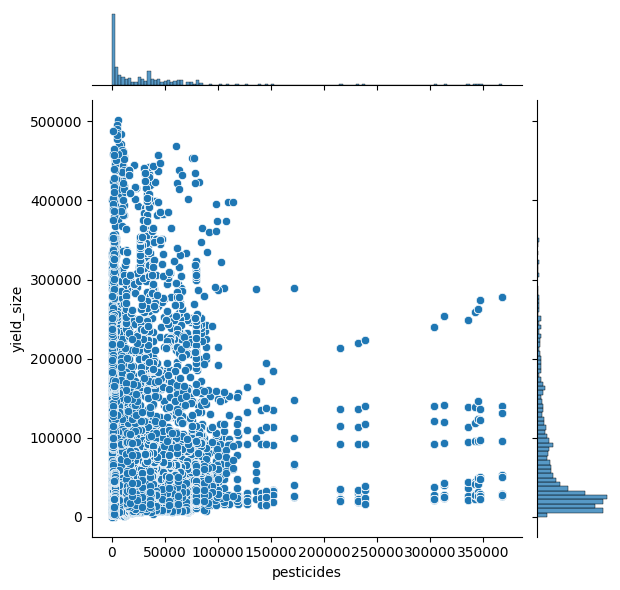

In [ ]:
sns.jointplot(x=yield_new['pesticides'], y=yield_new['yield_size'])

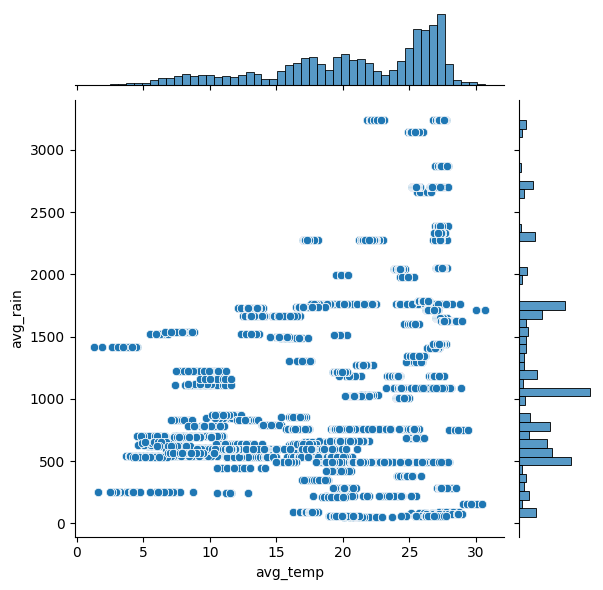

In [ ]:
sns.jointplot(x=yield_new['avg_temp'], y=yield_new['avg_rain'])

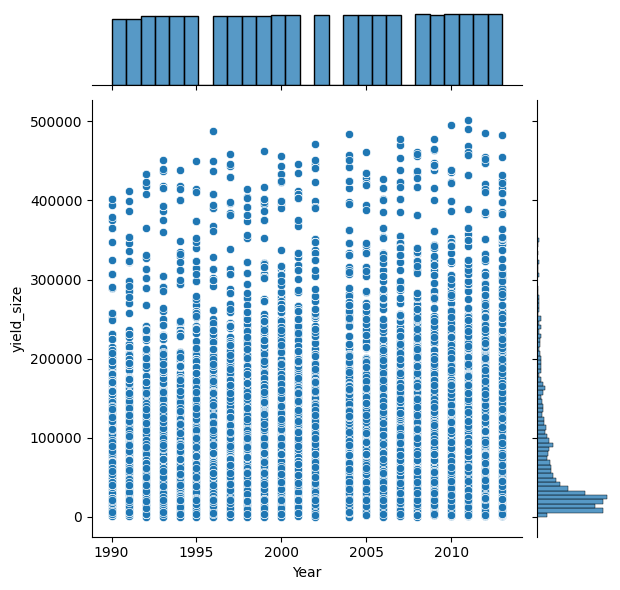

In [ ]:
sns.jointplot(x=yield_new['Year'], y=yield_new['yield_size'])

Yearly rate of corp yeild

In [ ]:
yearly = yield_new.groupby(['Year'])['yield_size'].sum()
yearly

Year
1990     77344486
1991     77194758
1992     81570324
1993     82528465
1994     83658971
1995     84958437
1996     85404470
1997     87100336
1998     87487196
1999     90375017
2000     92712544
2001     94125482
2002     95452607
2004     99448084
2005     99666998
2006     99920133
2007    102505855
2008    104924415
2009    106004721
2010    107708095
2011    110690878
2012    111598012
2013    113759921
Name: yield_size, dtype: int64

<Axes: xlabel='Year'>

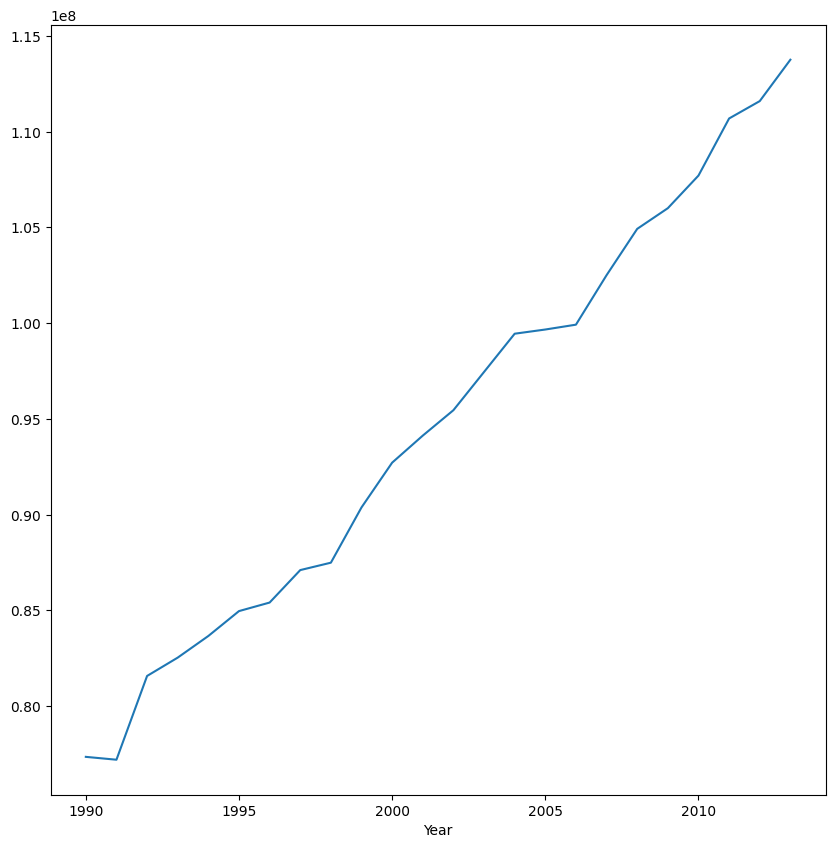

In [ ]:
yearly.plot(x="yield_size", y=["Year"],kind="line", figsize=(10, 10))

In [ ]:
corpR = yield_new[['Year','Item','yield_size']]

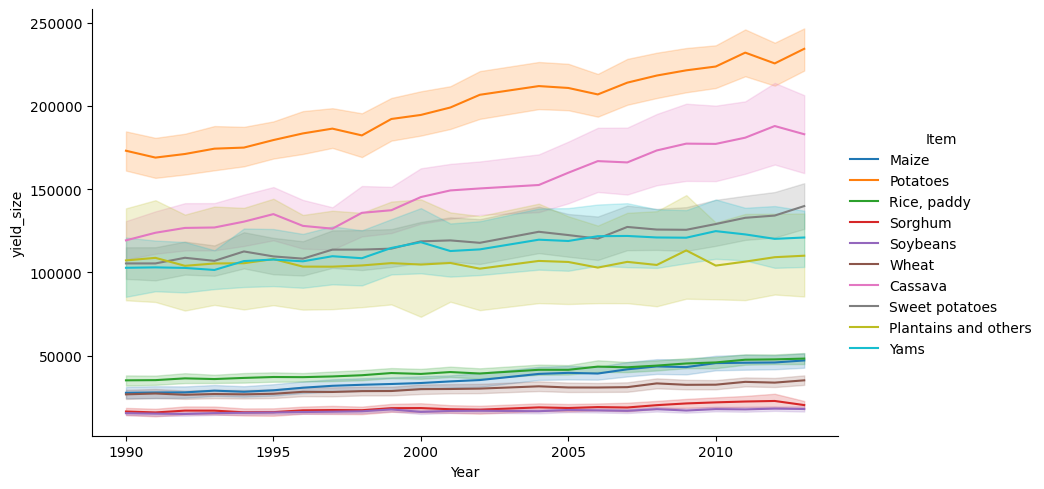

In [ ]:
Each_corp = sns.relplot(kind='line', data=yield_new, x='Year', y='yield_size', hue='Item', aspect=1.75)


Label Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
yield_onehot = pd.get_dummies(yield_new, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_onehot.loc[:, yield_onehot.columns != 'yield_size']
label=yield_new['yield_size']
features.head()

,Year,avg_rain,pesticides,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# **MODELLING**

Separate data training and data testing, and at the same time normalise dataset

In [ ]:
y=yield_onehot.yield_size
x=yield_onehot.drop('yield_size',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state = 42)
x_train.head()

,Year,avg_rain,pesticides,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
5835,2000,537.0,39667.0,7.63,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26573,1991,593.0,24343.0,13.21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11462,1995,1083.0,61257.0,25.92,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21931,1993,494.0,4945.0,27.25,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10239,1999,1976.0,2387.0,24.41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# print shape training
x_train.shape

(19769, 115)

In [ ]:
# print shape testing
x_test.shape

(8473, 115)

In [ ]:
# normalise dataset
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
X_test_norm = norm.transform(x_test)

Model: Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_norm,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_norm)

Evaluating Model

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.609937448365396


In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

KeyError: ignored

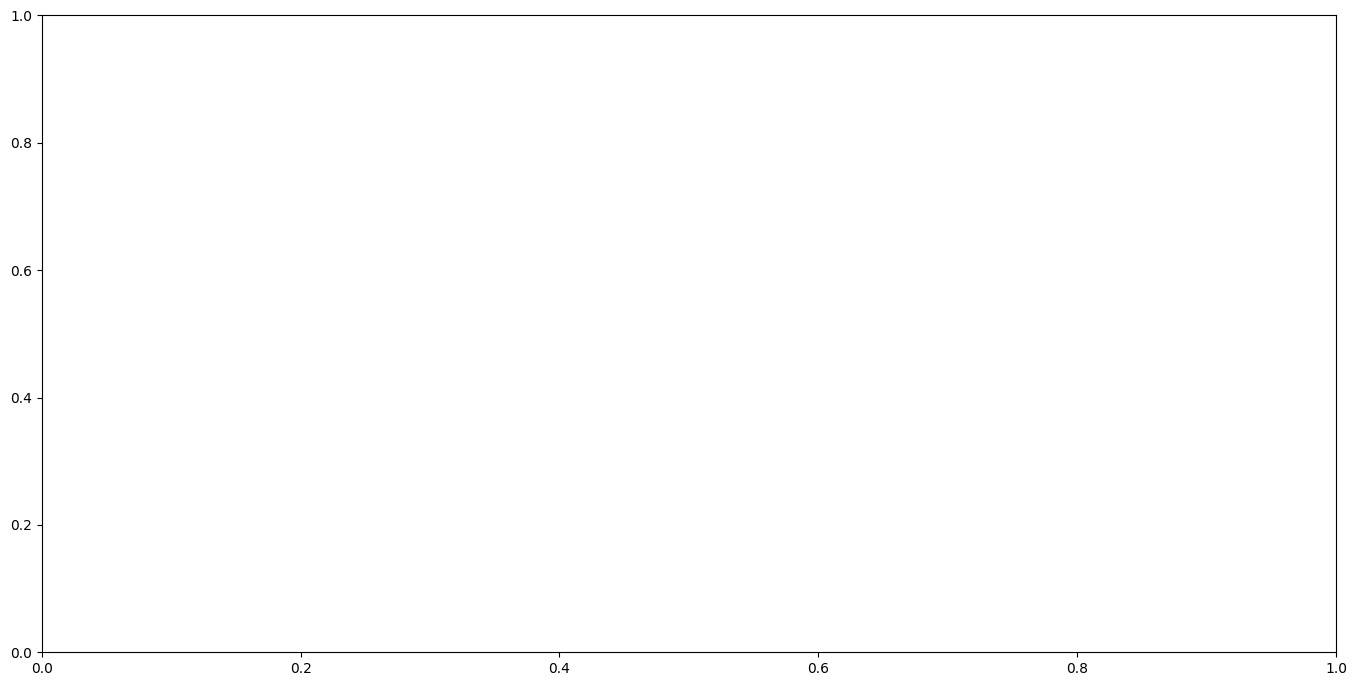

In [ ]:
# most important factors that affect crops 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(yield_data)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);